In [1]:
import tensorflow as tf

In [3]:
import tensorflow.keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [20]:
path = r'\DL_Lab\ecg-csv\ecg-csv\ecg.csv'
df =pd.read_csv(path, header=None)
df=df.drop(140, axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.513738,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.123739,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,0.205543,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.218185,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932


In [21]:
df.shape

(4998, 140)

In [25]:
from sklearn.preprocessing import StandardScaler
std = StndardScaler()
df=std.fit_transform(df)

array([[ 0.13015314, -0.81456844, -0.92422829, ...,  0.41209124,
         0.77172417,  0.63616554],
       [-0.72754575, -1.62378238, -1.29351275, ...,  0.76190873,
         0.87786548, -0.51593741],
       [-0.26432105, -0.65284576, -0.99660187, ...,  0.51840757,
         0.76022193,  0.2013596 ],
       ...,
       [-0.74671683, -0.4172529 , -0.27050469, ..., -1.20017695,
        -0.83057384, -0.77902953],
       [-0.24750005, -0.16584826, -0.25041586, ...,  1.0241232 ,
         0.89470289,  1.06875185],
       [-0.9452788 , -0.38686749, -0.01991038, ..., -0.86987066,
        -0.59541889,  0.01558609]])

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df, test_size=0.2)

In [29]:
x_train.shape

(3998, 140)

In [34]:
print(x_train.shape[1])

140


In [84]:
encoder = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
    Dense(8,activation='relu'),
])


decoder = Sequential([
    Input(shape=(8,)),
    Dense(16,activation='relu'),
    Dense(32,activation='relu'),
    Dense(64,activation='relu'),
    Dense(x_train.shape[1],activation='linear'),
])

model = Sequential([
    encoder,
    decoder
])

In [85]:
model.compile(optimizer ='adam' , loss= 'mean_squared_error', metrics=['accuracy'])

In [86]:
model.fit(x_train, x_train , validation_data=(x_test,x_test), epochs=10,batch_size=30, shuffle=True)

Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.0211 - loss: 0.7656 - val_accuracy: 0.0340 - val_loss: 0.3684
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0348 - loss: 0.3614 - val_accuracy: 0.0490 - val_loss: 0.3251
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0610 - loss: 0.3052 - val_accuracy: 0.1230 - val_loss: 0.2659
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1164 - loss: 0.2581 - val_accuracy: 0.1320 - val_loss: 0.2338
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1366 - loss: 0.2205 - val_accuracy: 0.1500 - val_loss: 0.2143
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.1376 - loss: 0.1939 - val_accuracy: 0.1400 - val_loss: 0.1901
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.1336 - loss: 0.1839 - val_accuracy: 0.1400 - val_loss: 0.1774
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.1405 - loss: 0.1645 - val_accu

<Axes: >

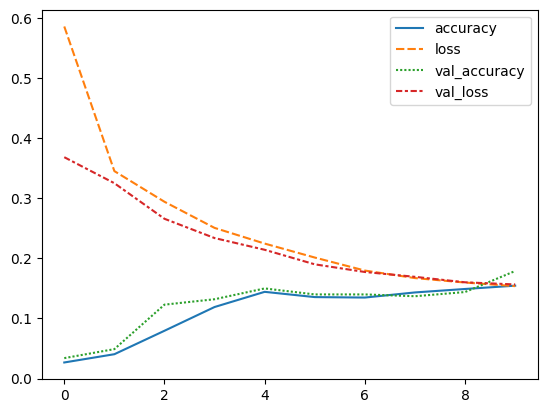

In [87]:
import seaborn as sns
sns.lineplot(model.history.history)

In [88]:
prediction = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 


In [89]:
mse = np.mean(np.power(x_test-prediction,2),axis=1)

In [90]:
mse

array([0.08362763, 0.063835  , 0.06207266, 0.04757425, 0.04449836,
       0.19454805, 0.05191208, 0.20459926, 0.08068991, 0.34799506,
       0.05029881, 0.07496849, 0.10670501, 0.14920185, 0.0603718 ,
       0.07576719, 0.05441253, 0.0376014 , 0.16387767, 0.16271918,
       0.05684193, 0.08707408, 0.10842354, 0.075435  , 0.06324235,
       0.03026705, 0.0869443 , 0.04528829, 0.13385009, 1.31993514,
       0.03208666, 0.0810799 , 0.06842324, 0.02563013, 0.10275402,
       0.15371743, 0.04556677, 0.11319992, 0.1069115 , 0.08305537,
       0.0625946 , 0.12577844, 0.06177268, 0.25463931, 0.0747004 ,
       0.21823573, 0.03390368, 0.07404214, 0.07116994, 0.09225115,
       0.16326194, 0.10659305, 0.0765194 , 0.68768259, 0.18898712,
       5.71586571, 0.19888509, 0.04229142, 0.72617475, 0.06993631,
       0.14697202, 0.16799162, 0.11188733, 0.23426196, 0.05595549,
       0.07585333, 0.0597431 , 0.04507471, 0.04640694, 0.08006224,
       0.08674062, 0.06825219, 0.10344225, 0.32793772, 0.09233

In [91]:
threshold = np.percentile(mse,95)
threshold

0.36357919677628103

In [92]:
anomalies = mse>threshold
anomalies

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,

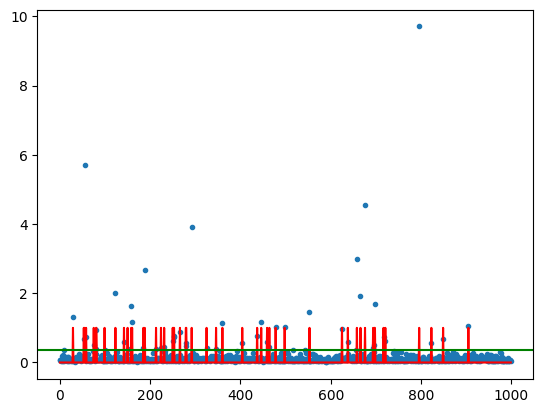

In [93]:
plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE')
plt.plot(anomalies, color='r')
plt.axhline(threshold, color='g')

C:\Users\Chetan\AppData\Local\Temp\ipykernel_10580\4224096480.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0, 0.5, 'Amplitude')

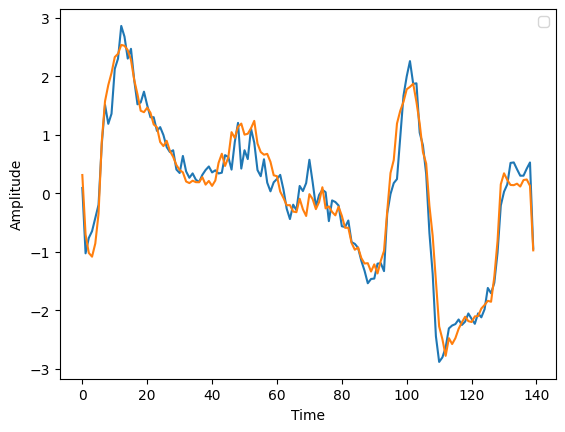

In [94]:
plt.plot(x_test[0])
plt.plot(prediction[0])
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')